# Training fast thermal equilibration protocol for harmonic potentials with variable stiffness

In [1]:
import torch
import numpy as np
from langesim_optim import Simulator, VariableStiffnessHarmonicForce, loss_fn_k, loss_fn_control_k_vars, device
from langesim_optim import train_loop, train_loop_snapshots, plot_test_hist, plot_protocols

In [2]:
ki = 0.5
kf = 1.0
tf = 1.0/30.0
dt = 0.0001
tot_steps = int(tf / dt) 
tot_sims = 100_000
lr = 10_000.0
epochs = 60
snapshot_step = 10

In [3]:
force = VariableStiffnessHarmonicForce(kappai=ki , kappaf=kf, tf=tf, steps=10, continuous=True)

In [4]:
sim = Simulator(dt=dt, tot_steps=tot_steps, force=force, device=device)

In [5]:
device

'cuda'

In [6]:
sim.train()

Simulator(
  (force): VariableStiffnessHarmonicForce()
)

In [7]:
optimizer = torch.optim.SGD(params=sim.parameters(), lr=lr)

In [8]:
scheduler = None

In [11]:
yrange=(-0.1, 18.0)
y_ticks=[0, ki, 1 ] + [5, 10, 15]
y_ticklabels=[0, "", 1, 5, 10, 15]

## Training with a control on the variations of $\kappa(t)$ by using loss_fn_control_k_vars as the loss function, with blend=5e-5.

Epoch=0     | loss=1.26787908E-02
Epoch=1     | loss=8.64668284E-03
Epoch=2     | loss=6.02317508E-03
Epoch=3     | loss=4.39472031E-03
Epoch=4     | loss=3.13349254E-03
Epoch=5     | loss=2.35018437E-03
Epoch=6     | loss=1.71875604E-03
Epoch=7     | loss=1.43491174E-03
Epoch=8     | loss=1.06232148E-03
Epoch=9     | loss=1.03948987E-03
Epoch=10    | loss=8.23114184E-04
Epoch=11    | loss=7.63506978E-04
Epoch=12    | loss=7.34274799E-04
Epoch=13    | loss=6.57894474E-04
Epoch=14    | loss=6.84285129E-04
Epoch=15    | loss=6.71835034E-04
Epoch=16    | loss=6.05341629E-04
Epoch=17    | loss=5.95663383E-04
Epoch=18    | loss=5.84866269E-04
Epoch=19    | loss=5.83723886E-04
Epoch=20    | loss=5.89818927E-04
Epoch=21    | loss=6.08367729E-04
Epoch=22    | loss=5.73674624E-04
Epoch=23    | loss=5.64376940E-04
Epoch=24    | loss=5.48876298E-04
Epoch=25    | loss=5.55772625E-04
Epoch=26    | loss=5.40013541E-04
Epoch=27    | loss=5.46831347E-04
Epoch=28    | loss=5.46561612E-04
Epoch=29    | 

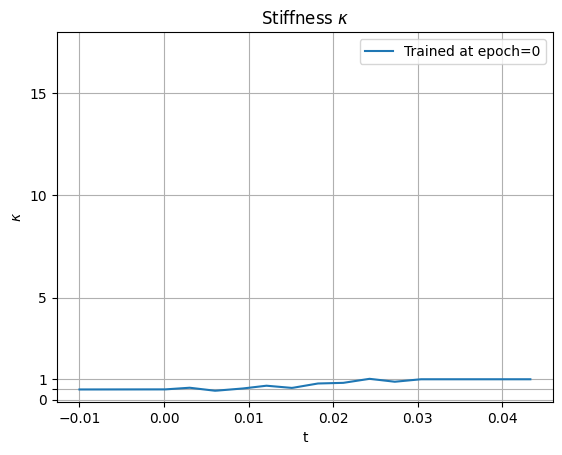

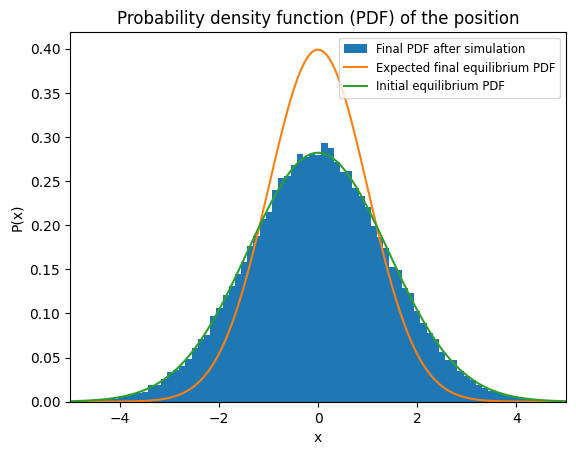

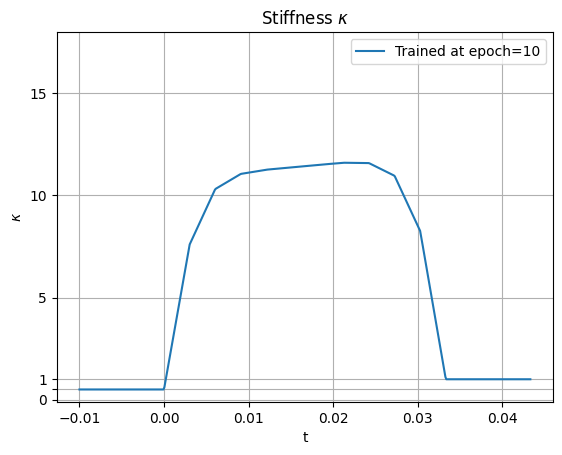

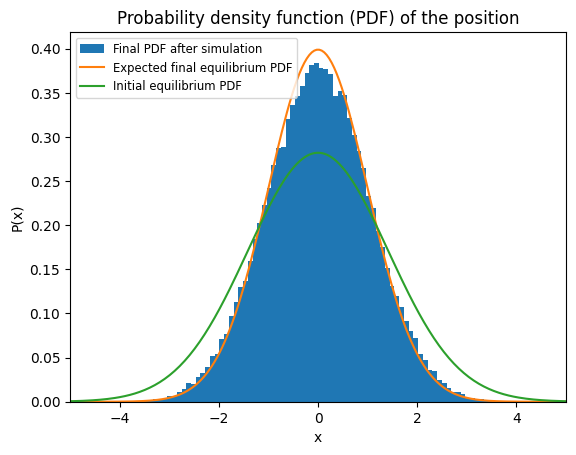

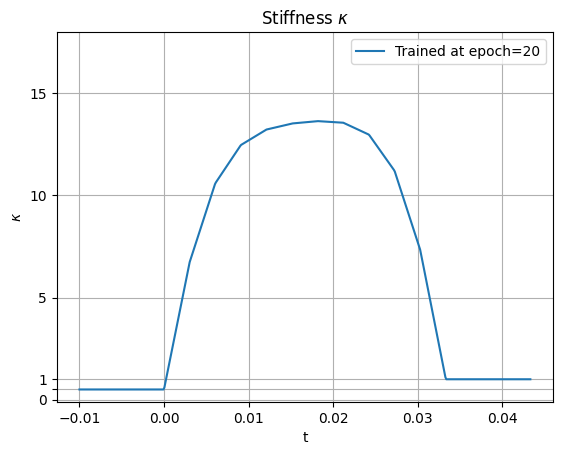

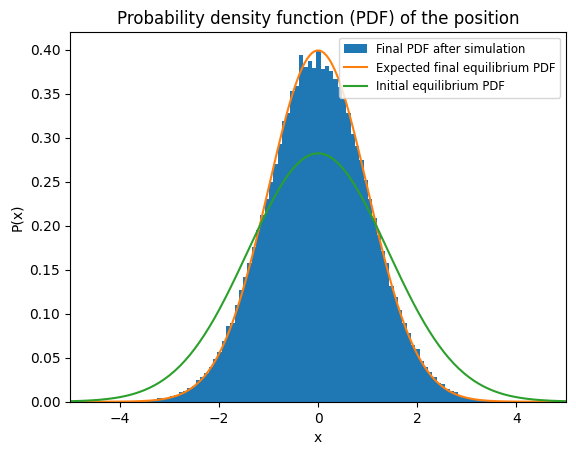

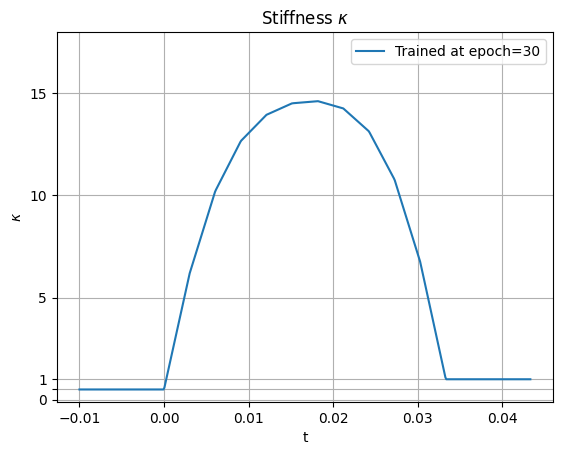

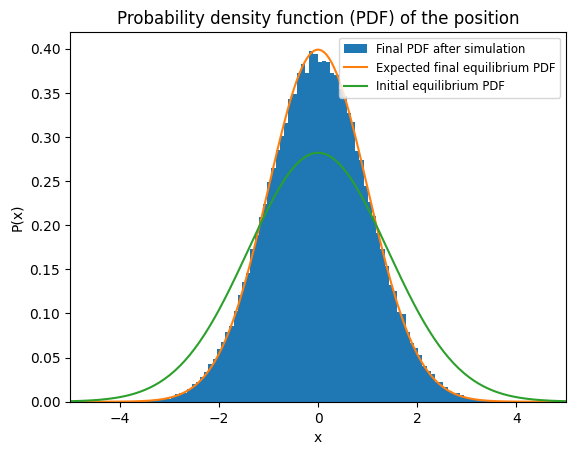

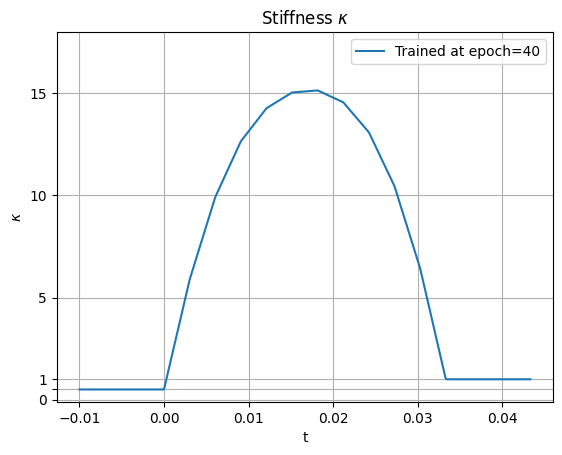

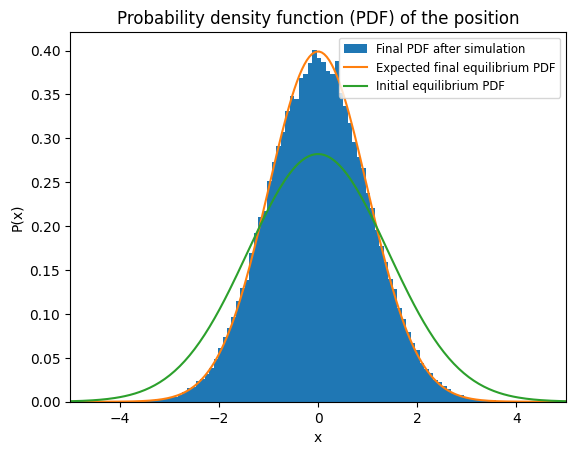

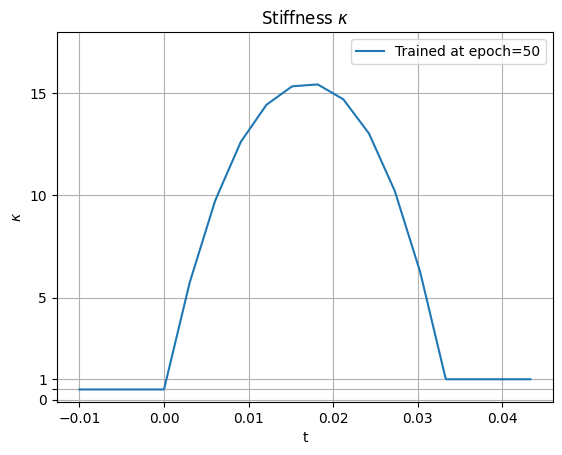

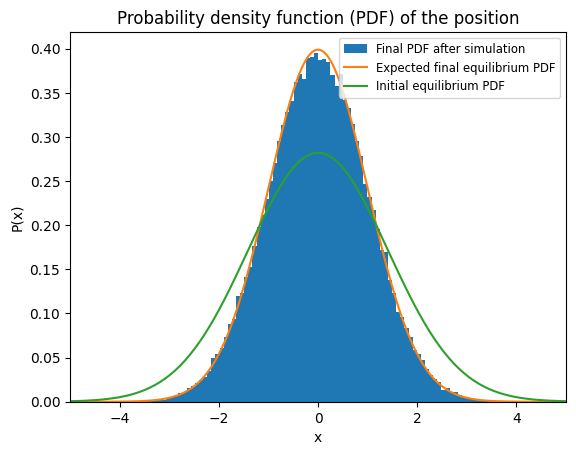

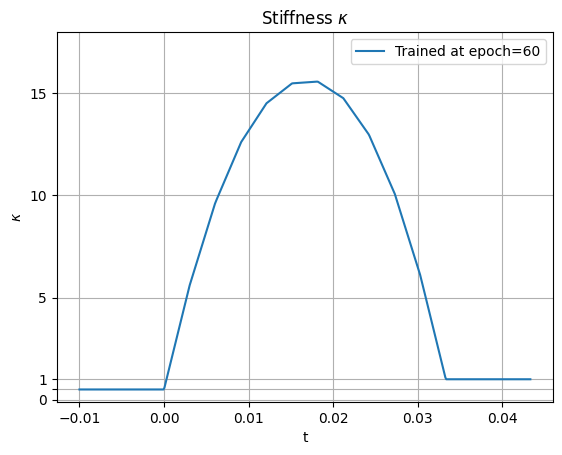

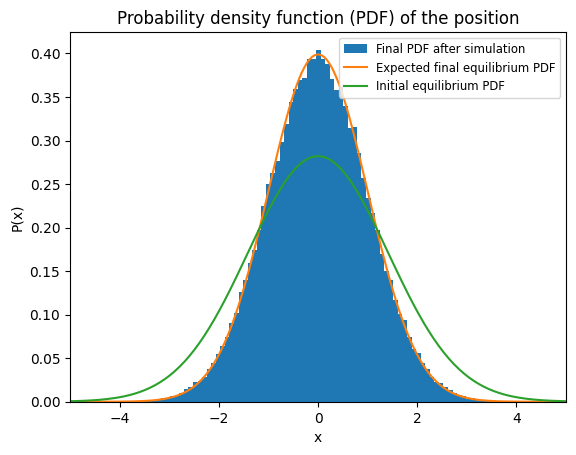

In [12]:
lossl, protocols, plots = train_loop_snapshots( epochs=epochs, 
                                                sim=sim,
                                                tot_sims=tot_sims,
                                                ki=ki, 
                                                kf=kf,
                                                tf=tf,
                                                optimizer=optimizer, 
                                                loss_fn=loss_fn_control_k_vars,
                                                scheduler=scheduler,
                                                device=device,
                                                snapshot_step=snapshot_step,
                                                xrange=5.0,
                                                bins=100,
                                                times=np.linspace(-0.01, tf+0.01, 500),
                                                yrange=yrange,
                                                y_ticks=y_ticks,
                                                y_ticklabels=y_ticklabels,
                                                blend=5e-5)

In [14]:
import matplotlib.pyplot as plt

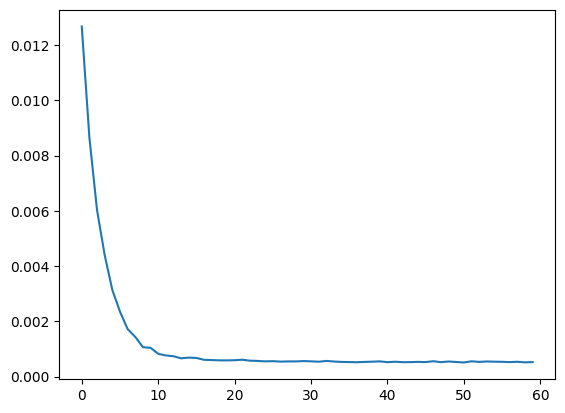

In [15]:
plt.plot(lossl)

In [18]:
force0 = VariableStiffnessHarmonicForce(kappai=ki , kappaf=kf, tf=tf, steps=10, continuous=True)
sim0 = Simulator(dt=dt, tot_steps=tot_steps, force=force0, device=device)
optimizer = torch.optim.SGD(params=sim0.parameters(), lr=lr)

## Train without controling $\kappa(t)$ variations

Epoch=0     | loss=1.28747029E-02
Epoch=1     | loss=8.75872094E-03
Epoch=2     | loss=6.03276957E-03
Epoch=3     | loss=3.86963948E-03
Epoch=4     | loss=2.54568784E-03
Epoch=5     | loss=1.69795973E-03
Epoch=6     | loss=1.15552649E-03
Epoch=7     | loss=8.32535559E-04
Epoch=8     | loss=4.33543988E-04
Epoch=9     | loss=2.63721391E-04
Epoch=10    | loss=1.41903976E-04
Epoch=11    | loss=9.66065491E-05
Epoch=12    | loss=5.34946084E-05
Epoch=13    | loss=5.94293269E-05
Epoch=14    | loss=1.05019908E-05
Epoch=15    | loss=1.17607888E-05
Epoch=16    | loss=1.19841088E-05
Epoch=17    | loss=8.95970970E-06
Epoch=18    | loss=1.08198328E-05
Epoch=19    | loss=1.66021746E-05
Epoch=20    | loss=8.46308740E-06
Epoch=21    | loss=3.48078743E-06
Epoch=22    | loss=8.30810040E-06
Epoch=23    | loss=8.30285899E-06
Epoch=24    | loss=1.07044898E-05
Epoch=25    | loss=1.88655995E-05
Epoch=26    | loss=6.51300525E-06
Epoch=27    | loss=3.97779195E-06
Epoch=28    | loss=7.85978955E-06
Epoch=29    | 

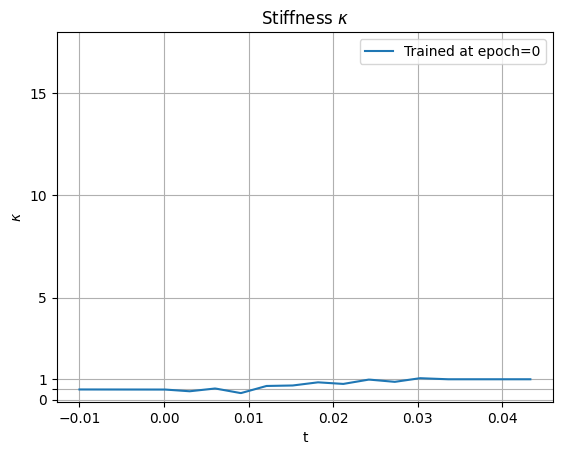

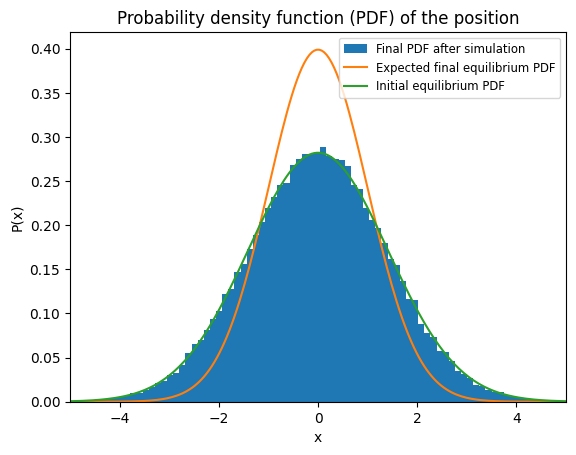

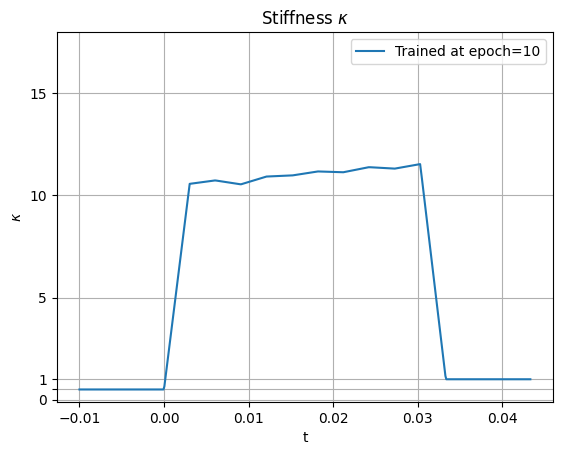

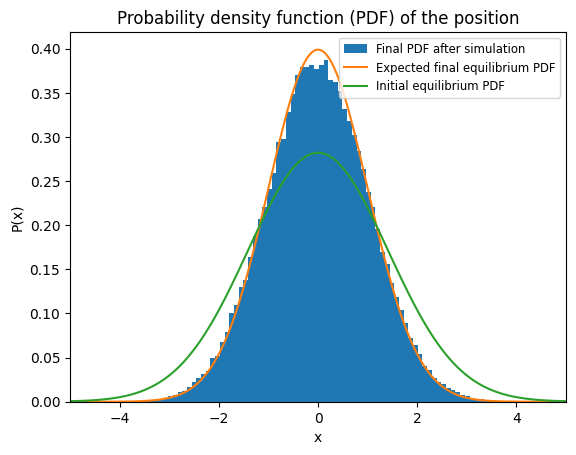

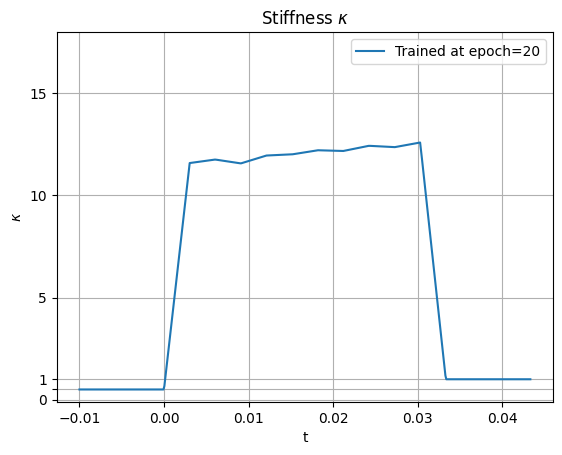

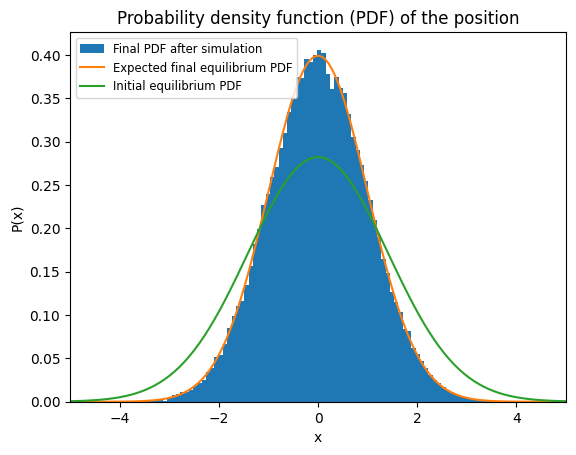

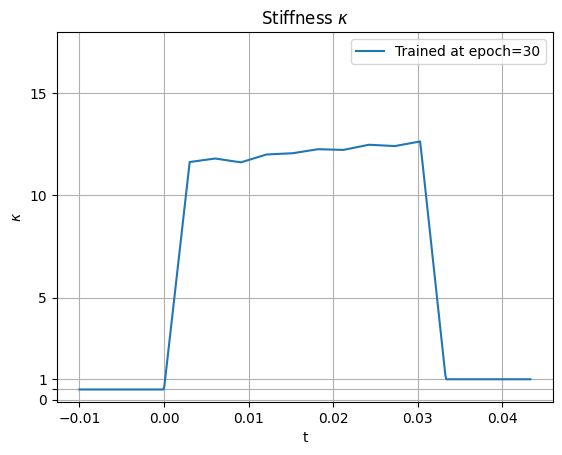

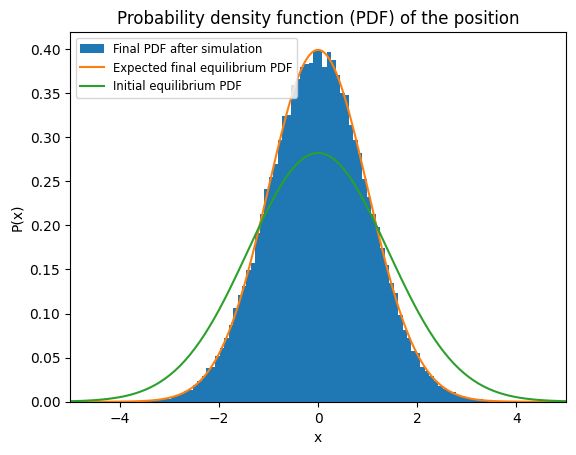

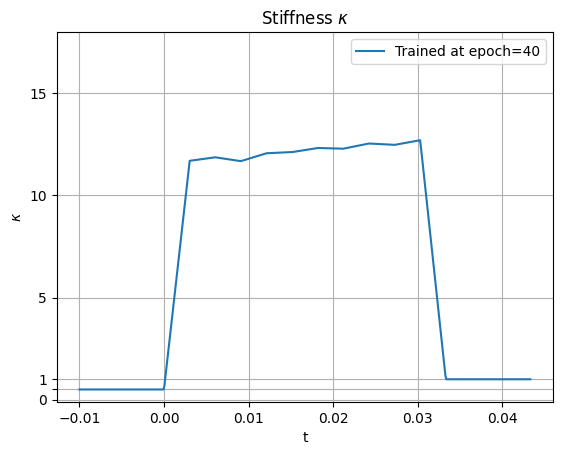

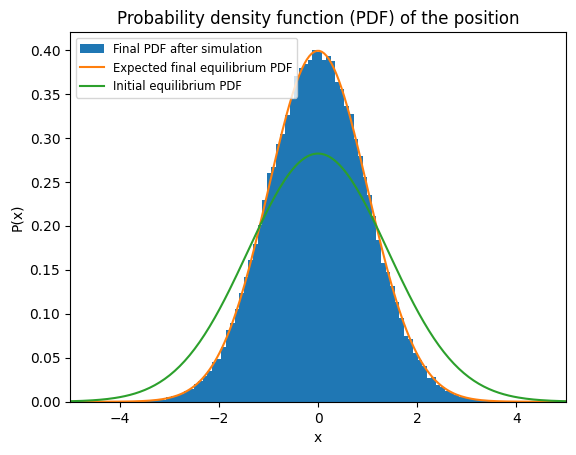

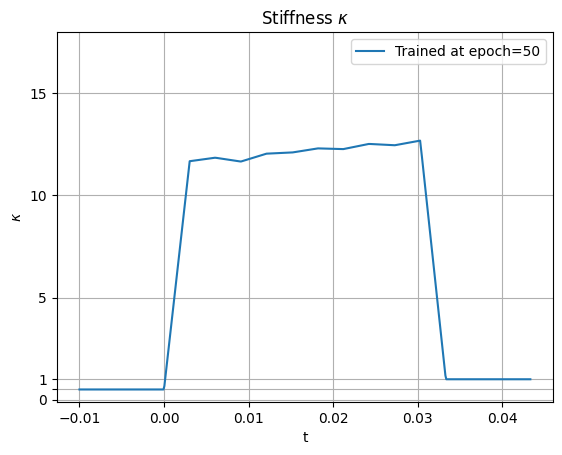

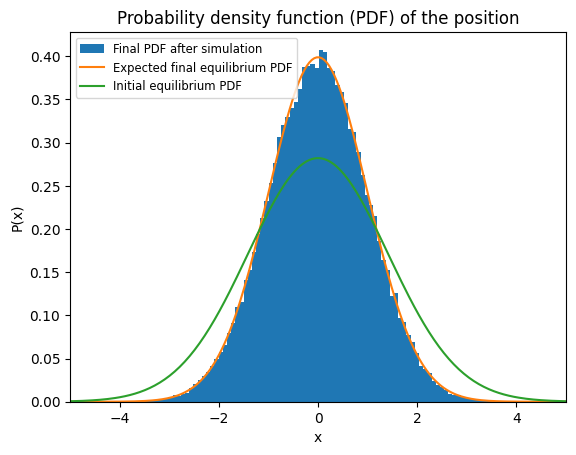

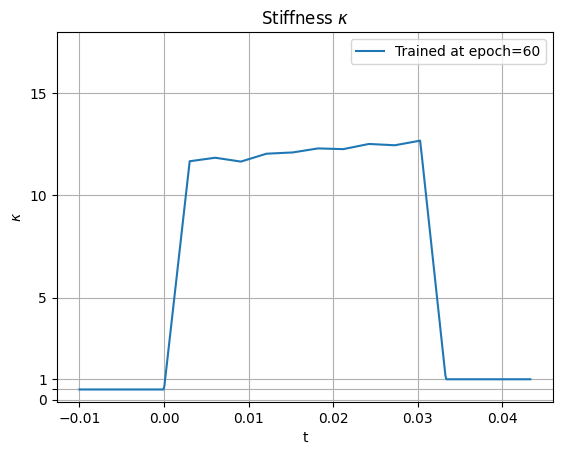

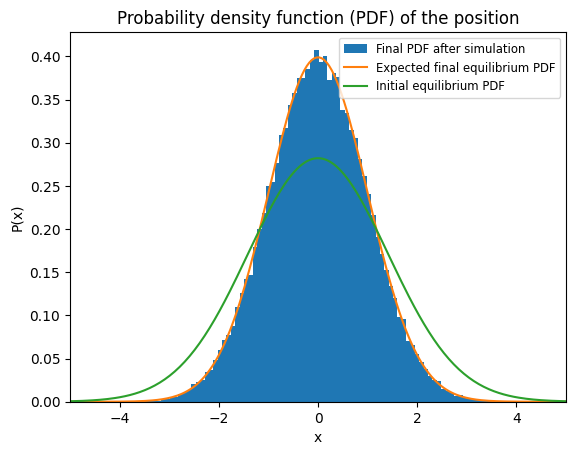

In [19]:
lossl0, protocols0, plots0 = train_loop_snapshots( epochs=epochs, 
                                                sim=sim0,
                                                tot_sims=tot_sims,
                                                ki=ki, 
                                                kf=kf,
                                                tf=tf,
                                                optimizer=optimizer, 
                                                loss_fn=loss_fn_k,
                                                scheduler=None,
                                                device=device,
                                                snapshot_step=snapshot_step,
                                                xrange=5.0,
                                                bins=100,
                                                times=np.linspace(-0.01, tf+0.01, 500),
                                                yrange=yrange,
                                                y_ticks=y_ticks,
                                                y_ticklabels=y_ticklabels,
                                                )

## Train with controlling $\kappa(t)$ variations strongly

In [25]:
force2 = VariableStiffnessHarmonicForce(kappai=ki , kappaf=kf, tf=tf, steps=10, continuous=True)
sim2 = Simulator(dt=dt, tot_steps=tot_steps, force=force2, device=device)
optimizer2 = torch.optim.SGD(params=sim2.parameters(), lr=lr)

Epoch=0     | loss=1.27869770E-02
Epoch=1     | loss=9.04828589E-03
Epoch=2     | loss=6.41150167E-03
Epoch=3     | loss=4.33582487E-03
Epoch=4     | loss=3.25747556E-03
Epoch=5     | loss=2.84861564E-03
Epoch=6     | loss=2.14750972E-03
Epoch=7     | loss=1.74904184E-03
Epoch=8     | loss=1.53109943E-03
Epoch=9     | loss=1.47880637E-03
Epoch=10    | loss=1.26429938E-03
Epoch=11    | loss=1.25248940E-03
Epoch=12    | loss=1.21093041E-03
Epoch=13    | loss=1.08614413E-03
Epoch=14    | loss=1.08943938E-03
Epoch=15    | loss=1.06749462E-03
Epoch=16    | loss=1.03755097E-03
Epoch=17    | loss=1.04989426E-03
Epoch=18    | loss=1.05555879E-03
Epoch=19    | loss=1.08326843E-03
Epoch=20    | loss=1.05520268E-03
Epoch=21    | loss=1.00752676E-03
Epoch=22    | loss=1.04538421E-03
Epoch=23    | loss=1.00939046E-03
Epoch=24    | loss=1.04911125E-03
Epoch=25    | loss=1.04490505E-03
Epoch=26    | loss=1.01353507E-03
Epoch=27    | loss=1.01280538E-03
Epoch=28    | loss=1.03512290E-03
Epoch=29    | 

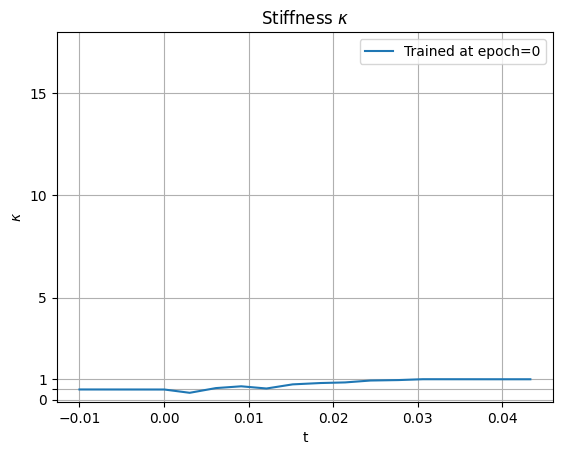

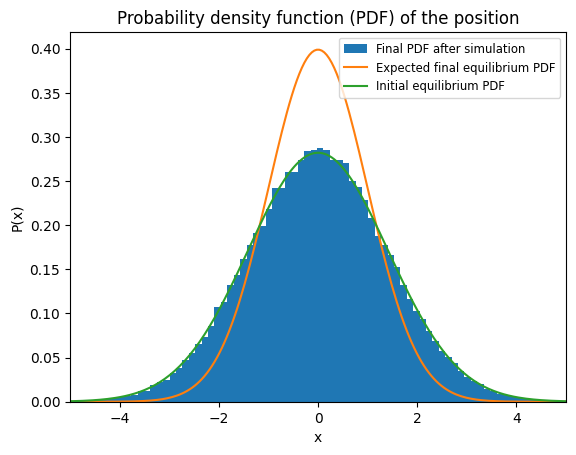

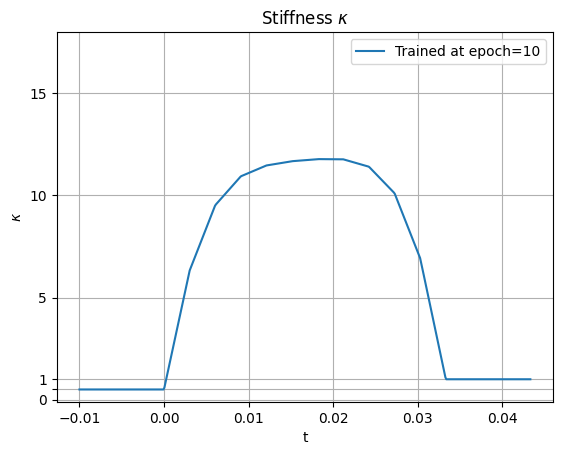

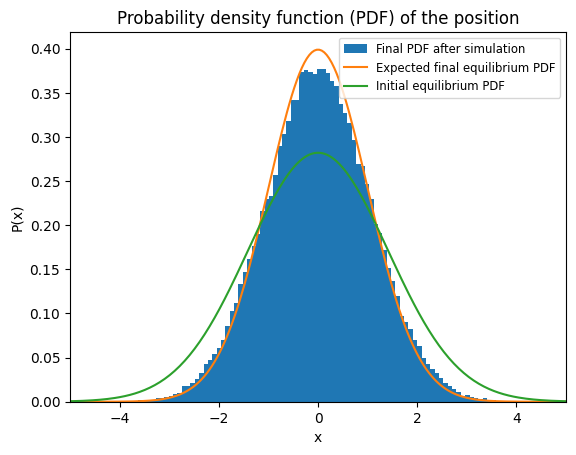

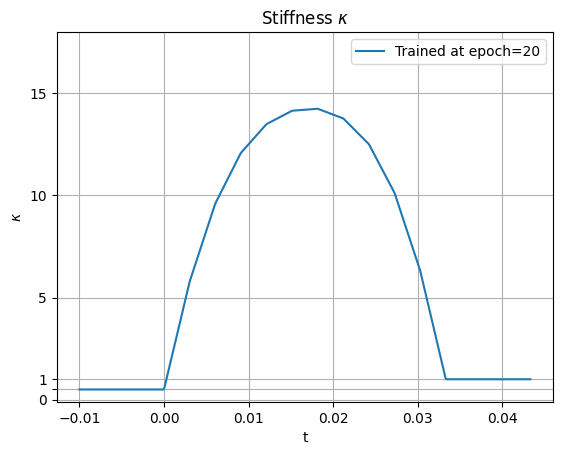

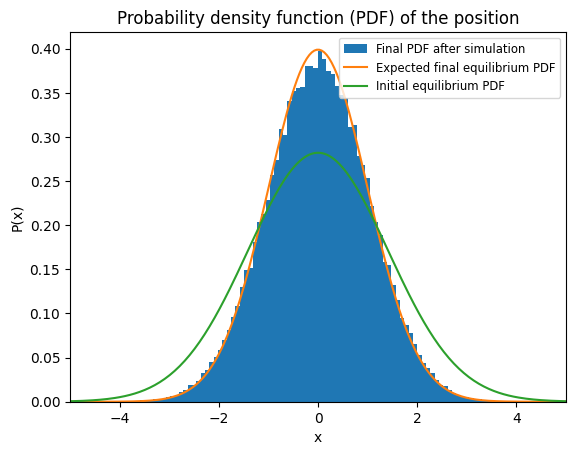

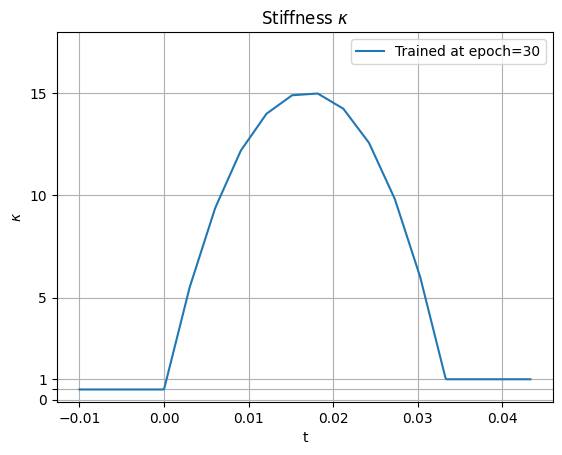

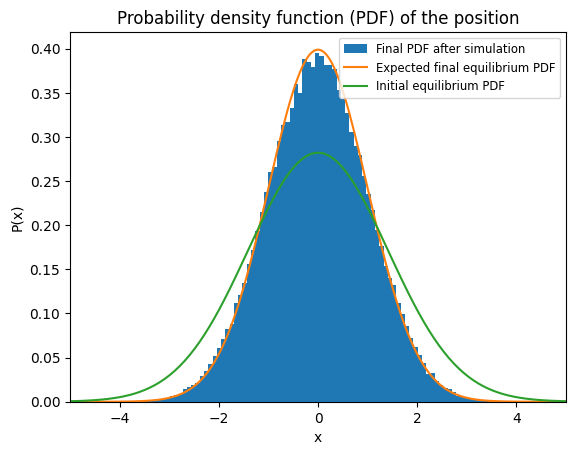

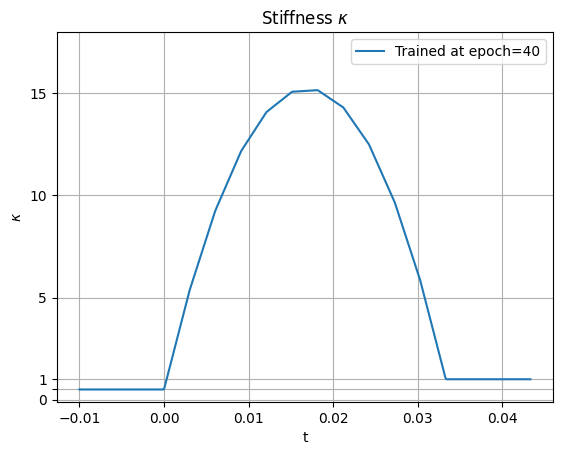

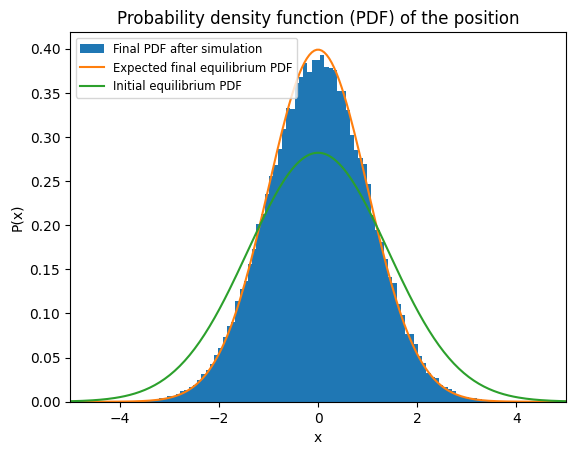

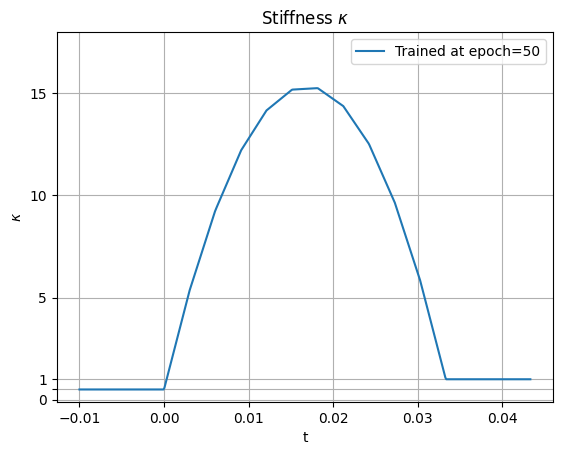

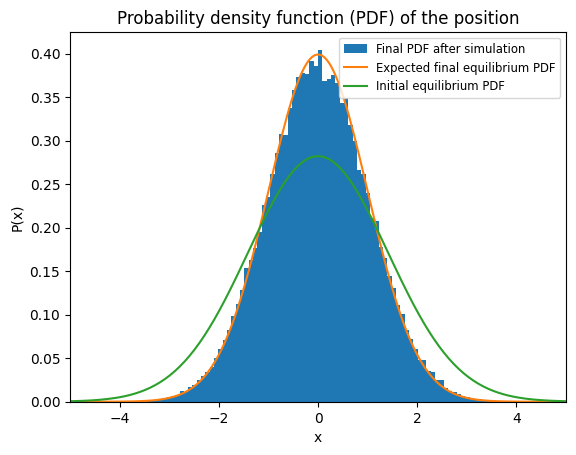

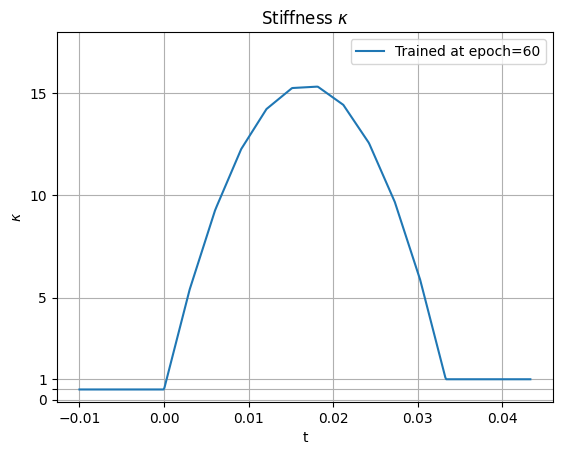

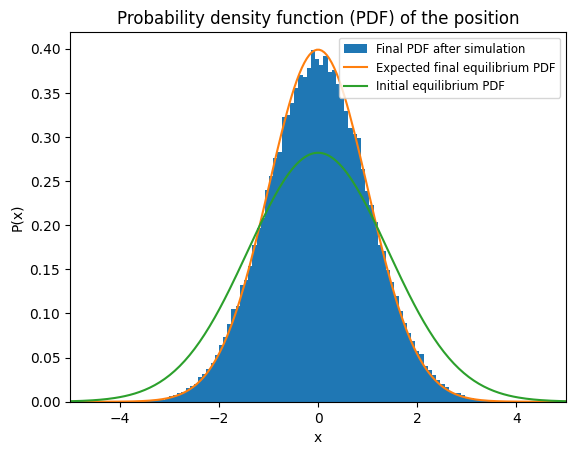

In [26]:
lossl2, protocols2, plots2 = train_loop_snapshots( epochs=epochs, 
                                                sim=sim2,
                                                tot_sims=tot_sims,
                                                ki=ki, 
                                                kf=kf,
                                                tf=tf,
                                                optimizer=optimizer2, 
                                                loss_fn=loss_fn_control_k_vars,
                                                scheduler=None,
                                                device=device,
                                                snapshot_step=snapshot_step,
                                                xrange=5.0,
                                                bins=100,
                                                times=np.linspace(-0.01, tf+0.01, 500),
                                                yrange=yrange,
                                                y_ticks=y_ticks,
                                                y_ticklabels=y_ticklabels,
                                                blend=1e-4)
                                                

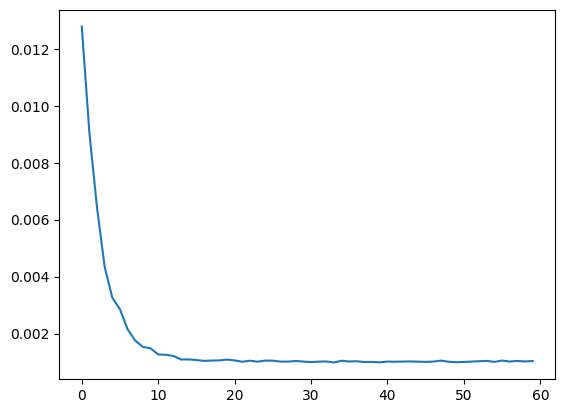

In [27]:
plt.plot(lossl2)

### Now let's relax the blend

Epoch=0     | loss=6.40037688E-05
Epoch=1     | loss=5.08054982E-05
Epoch=2     | loss=2.15007221E-05
Epoch=3     | loss=2.33823612E-05
Epoch=4     | loss=1.11098771E-05
Epoch=5     | loss=1.44548594E-05
Epoch=6     | loss=2.78386256E-06
Epoch=7     | loss=1.46834409E-05
Epoch=8     | loss=1.33609665E-05
Epoch=9     | loss=1.74257311E-05
Epoch=10    | loss=5.91331263E-06
Epoch=11    | loss=6.00651811E-06
Epoch=12    | loss=1.01775513E-05
Epoch=13    | loss=1.18990210E-05
Epoch=14    | loss=6.01427200E-06
Epoch=15    | loss=2.00193426E-06
Epoch=16    | loss=8.19400884E-06
Epoch=17    | loss=6.66451069E-06
Epoch=18    | loss=1.81243956E-06
Epoch=19    | loss=3.11569397E-06
Epoch=20    | loss=2.42715328E-06
Epoch=21    | loss=7.59064596E-06
Epoch=22    | loss=1.38544510E-05
Epoch=23    | loss=7.76899651E-06
Epoch=24    | loss=2.53967119E-06
Epoch=25    | loss=2.89365516E-06
Epoch=26    | loss=8.43154248E-06
Epoch=27    | loss=2.11127553E-05
Epoch=28    | loss=2.73327396E-06
Epoch=29    | 

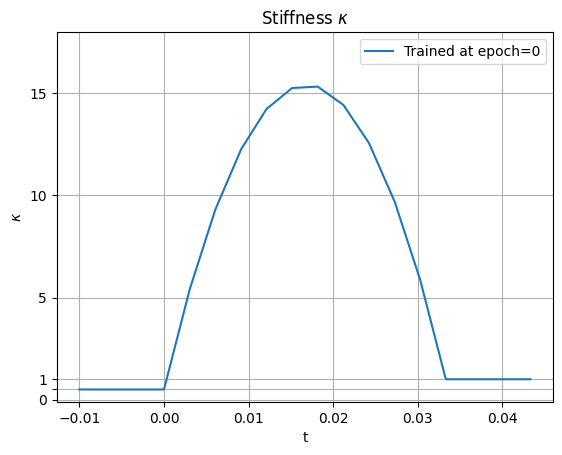

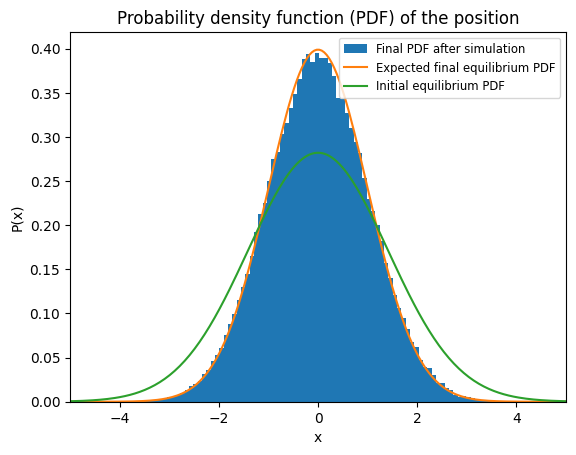

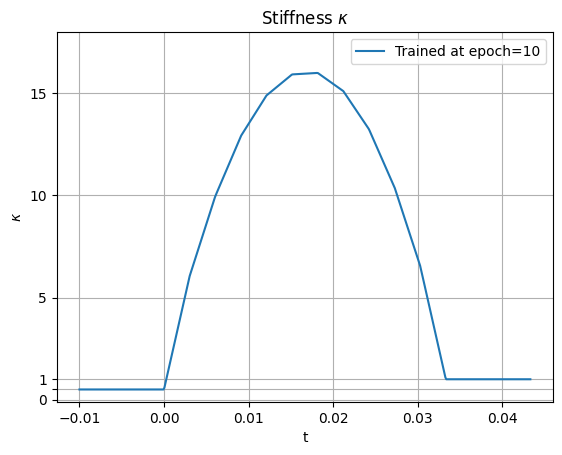

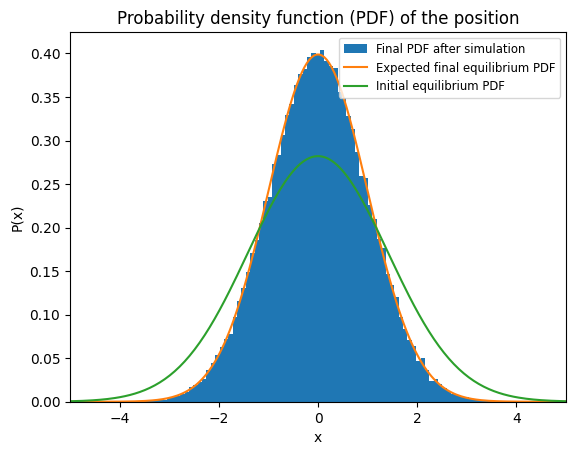

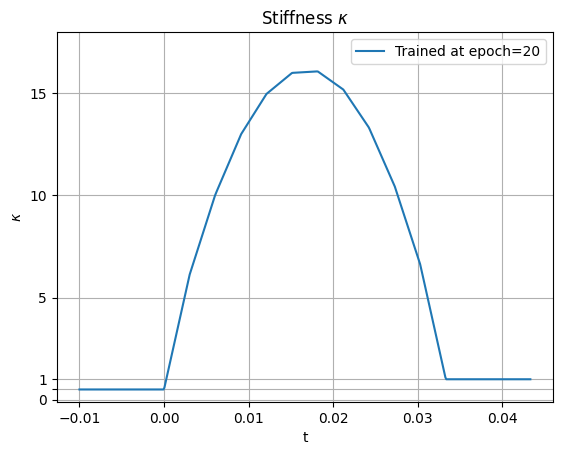

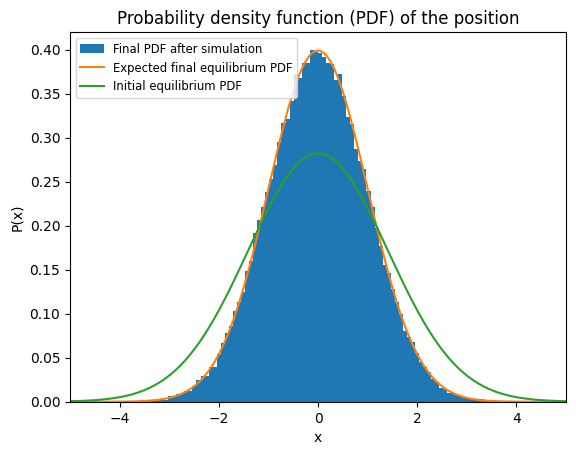

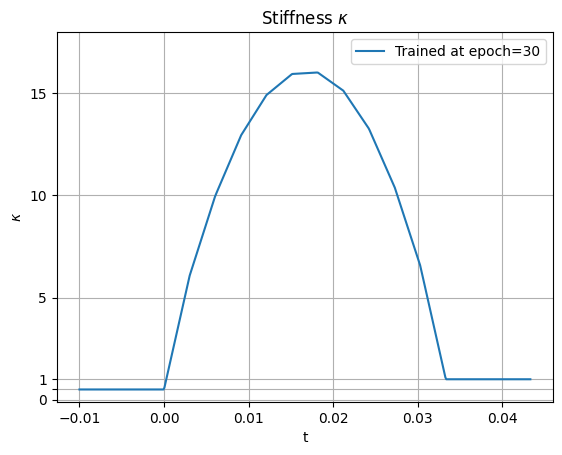

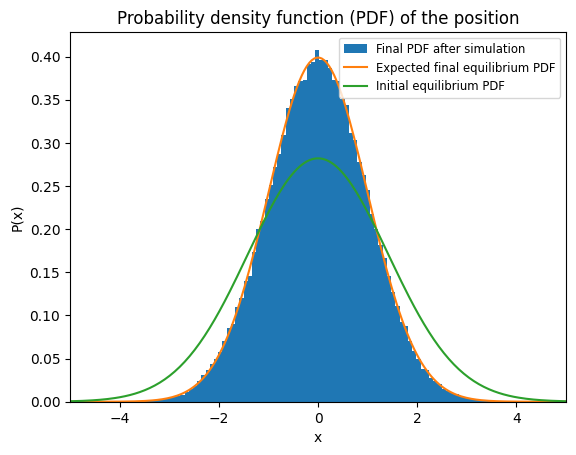

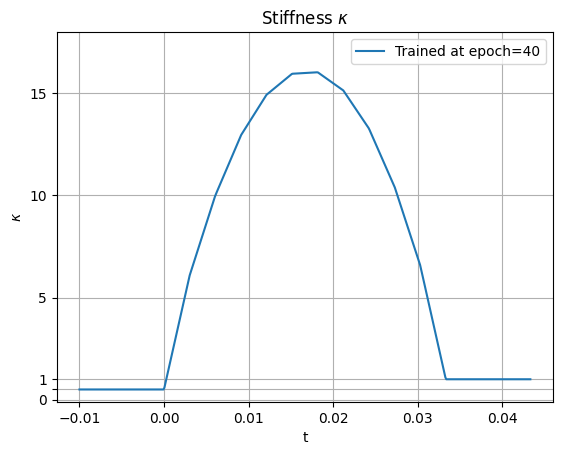

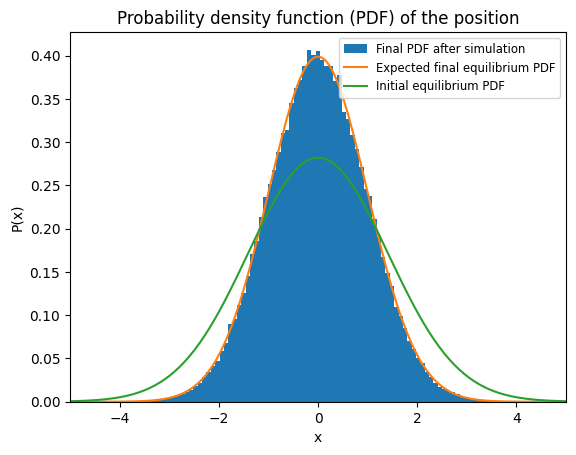

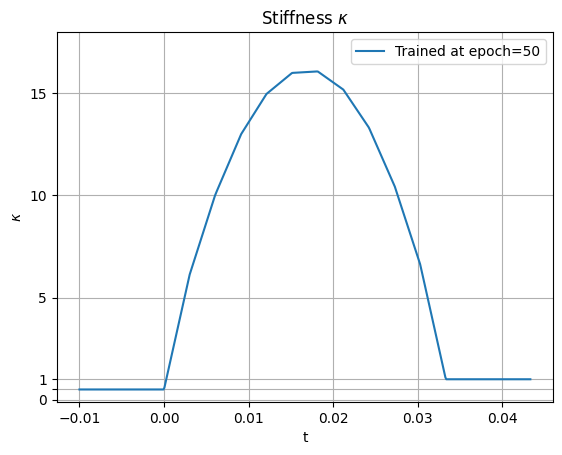

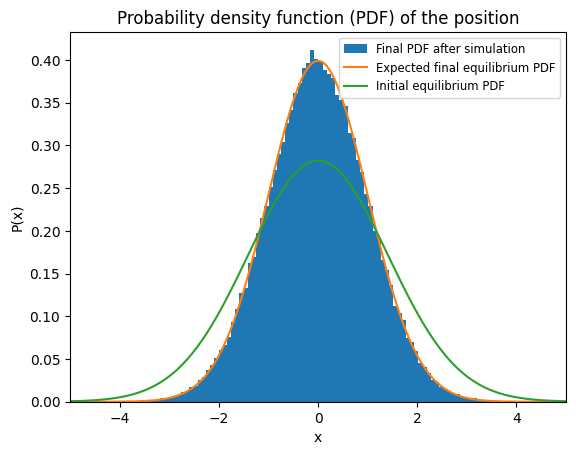

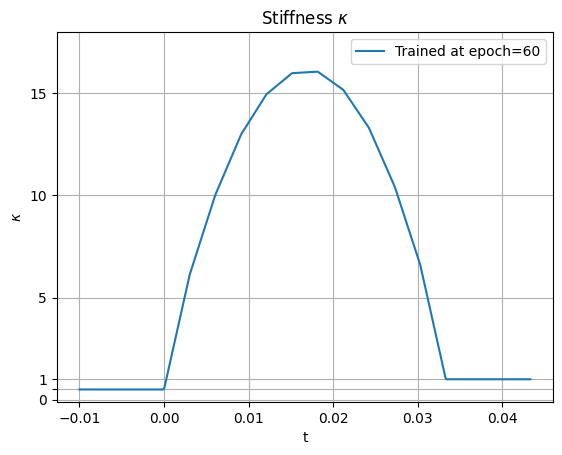

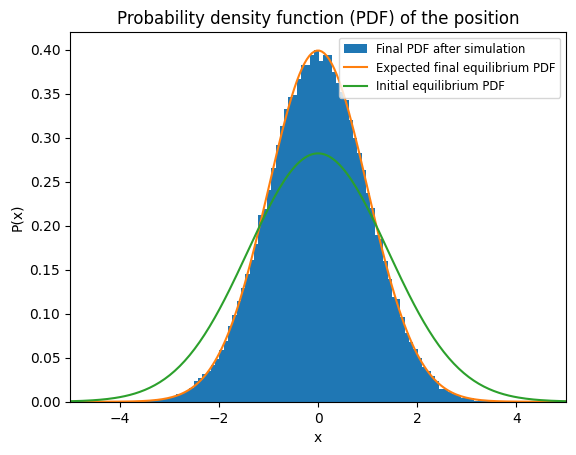

In [28]:
lossl2b, protocols2b, plots2b = train_loop_snapshots( epochs=epochs, 
                                                sim=sim2,
                                                tot_sims=tot_sims,
                                                ki=ki, 
                                                kf=kf,
                                                tf=tf,
                                                optimizer=optimizer2, 
                                                loss_fn=loss_fn_control_k_vars,
                                                scheduler=None,
                                                device=device,
                                                snapshot_step=snapshot_step,
                                                xrange=5.0,
                                                bins=100,
                                                times=np.linspace(-0.01, tf+0.01, 500),
                                                yrange=yrange,
                                                y_ticks=y_ticks,
                                                y_ticklabels=y_ticklabels,
                                                blend=0.0)

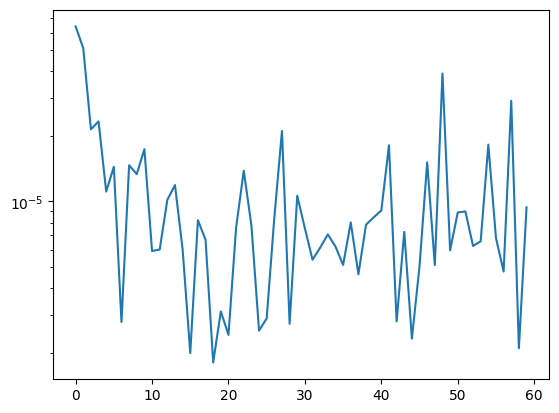

In [33]:
plt.semilogy(lossl2b)

### For comparison: training a two-step protocol with the same parameters

In [38]:
lr

10000.0

In [39]:
forceTSP = VariableStiffnessHarmonicForce(kappai=ki , kappaf=kf, tf=tf, steps=1, continuous=False)
simTSP = Simulator(dt=dt, tot_steps=tot_steps, force=forceTSP, device=device)
optimizerTSP = torch.optim.SGD(params=simTSP.parameters(), lr=1000.0)

Epoch=0     | loss=1.23551395E-02
Epoch=1     | loss=8.53789784E-03
Epoch=2     | loss=5.18391002E-03
Epoch=3     | loss=3.29862768E-03
Epoch=4     | loss=1.83234445E-03
Epoch=5     | loss=9.27309331E-04
Epoch=6     | loss=5.01992472E-04
Epoch=7     | loss=3.04790126E-04
Epoch=8     | loss=2.25255455E-04
Epoch=9     | loss=7.80035261E-05
Epoch=10    | loss=7.28977029E-05
Epoch=11    | loss=4.16536168E-05
Epoch=12    | loss=1.44918567E-05
Epoch=13    | loss=2.92050336E-05
Epoch=14    | loss=1.38379755E-05
Epoch=15    | loss=2.13468193E-05
Epoch=16    | loss=5.21094853E-06
Epoch=17    | loss=1.60315940E-05
Epoch=18    | loss=8.25612278E-06
Epoch=19    | loss=2.17017873E-06
Epoch=20    | loss=1.55111611E-05
Epoch=21    | loss=7.01412591E-06
Epoch=22    | loss=8.19380057E-06
Epoch=23    | loss=5.84029613E-06
Epoch=24    | loss=1.13524129E-05
Epoch=25    | loss=5.05085609E-06
Epoch=26    | loss=3.22789583E-06
Epoch=27    | loss=6.61550939E-06
Epoch=28    | loss=5.69072108E-06
Epoch=29    | 

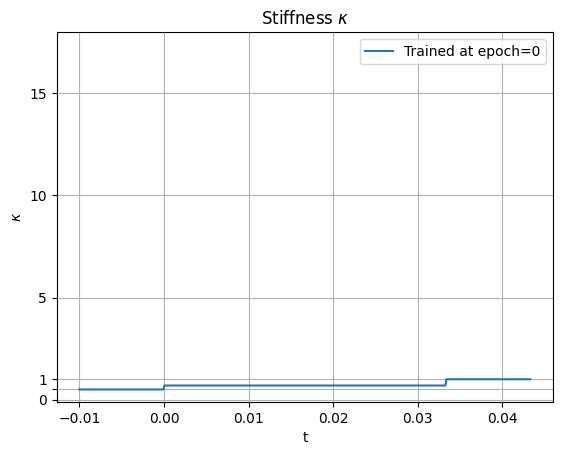

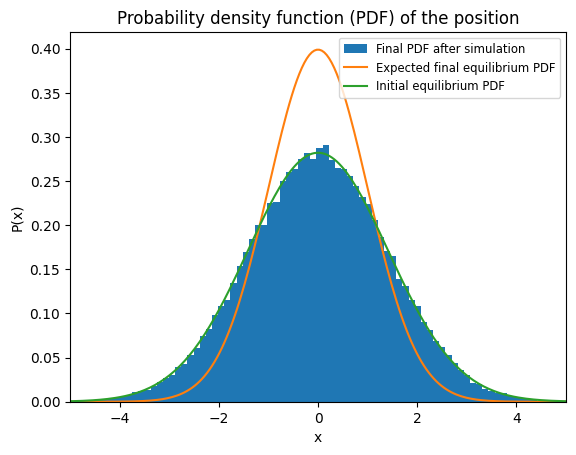

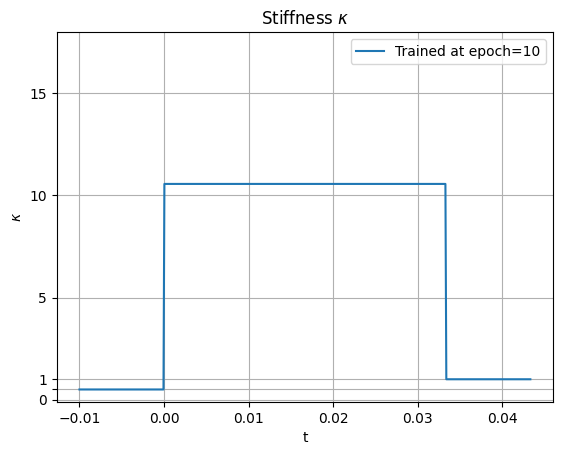

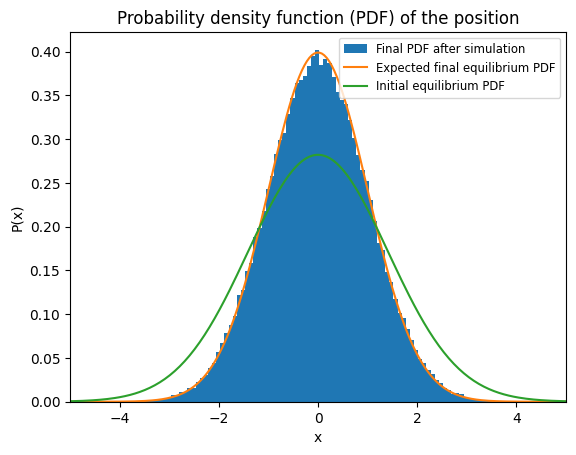

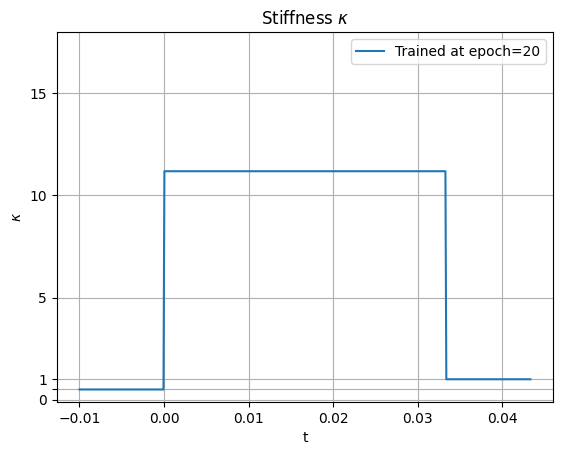

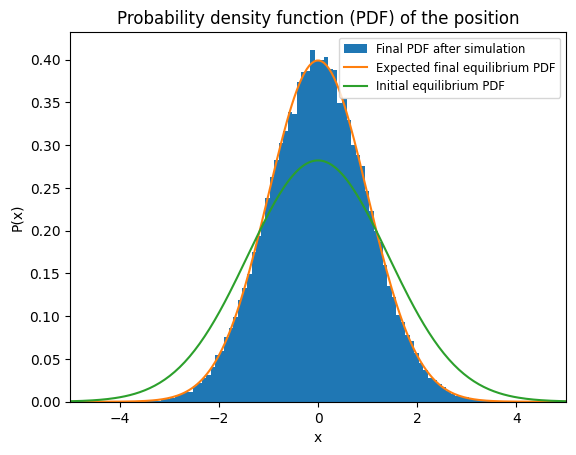

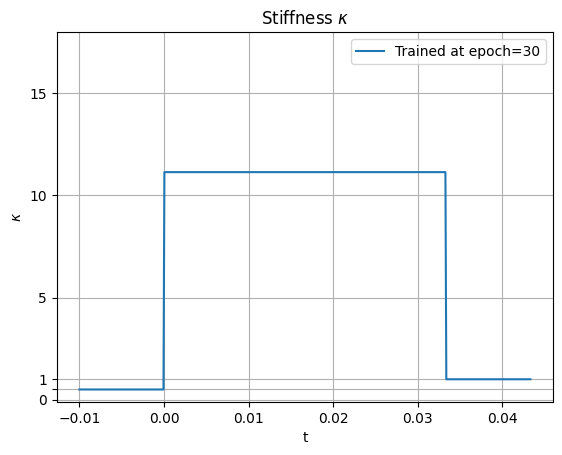

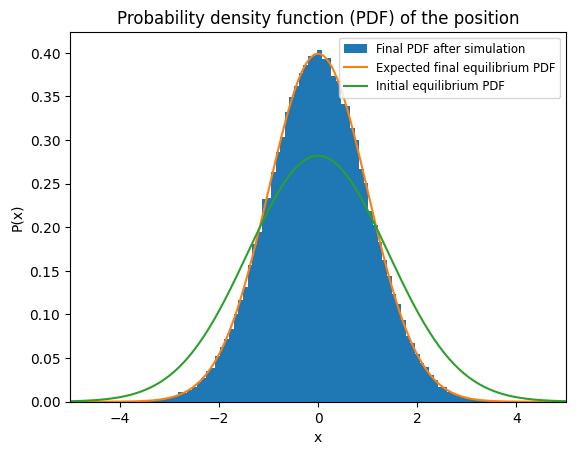

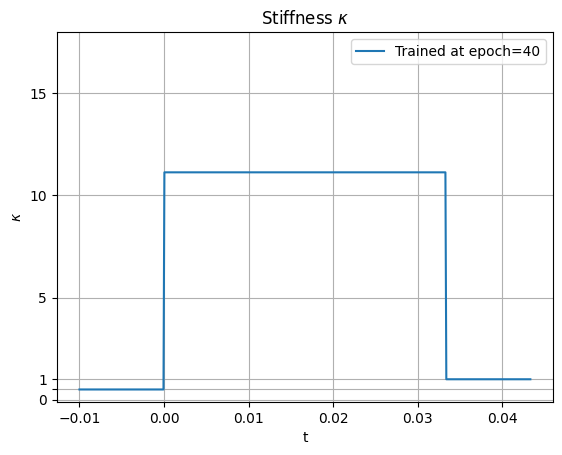

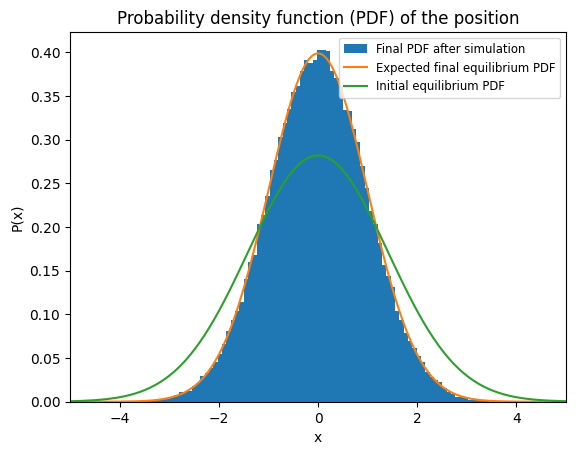

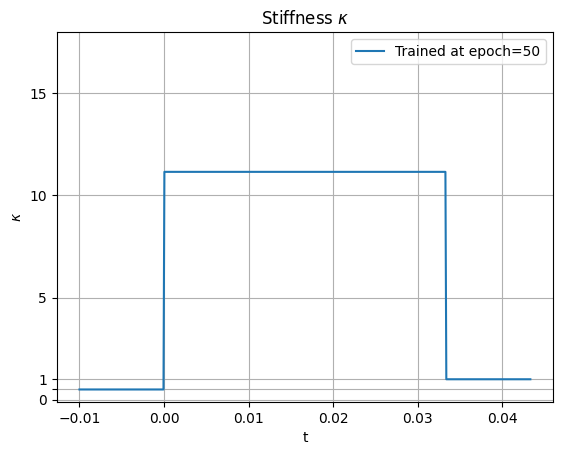

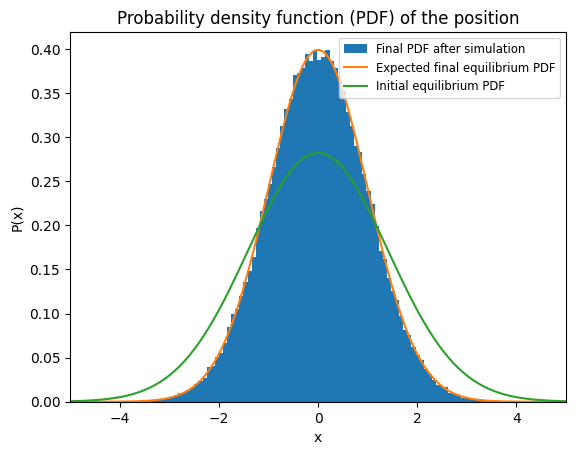

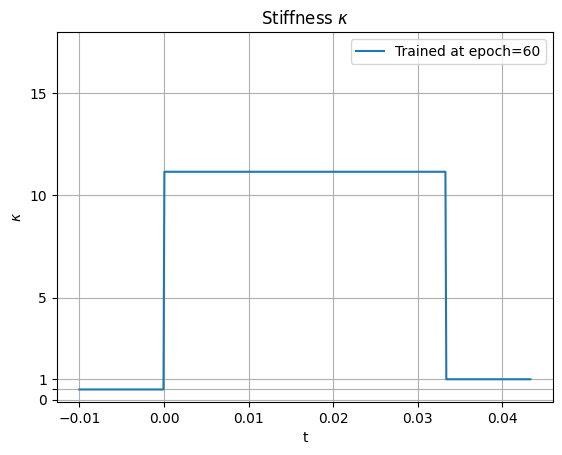

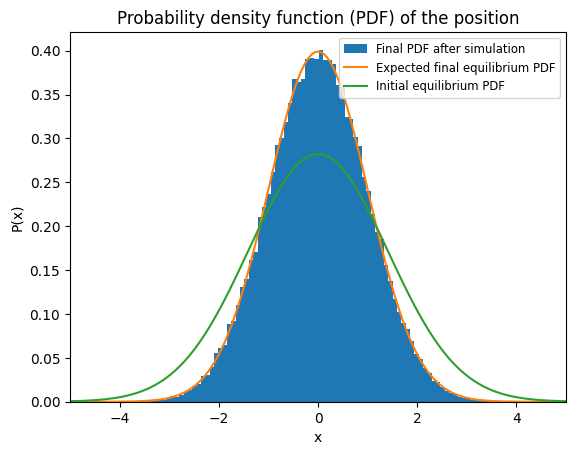

In [40]:
losslTSP, protocolsTSP, plotsTSP = train_loop_snapshots( epochs=epochs, 
                                                sim=simTSP,
                                                tot_sims=tot_sims,
                                                ki=ki, 
                                                kf=kf,
                                                tf=tf,
                                                optimizer=optimizerTSP, 
                                                loss_fn=loss_fn_k,
                                                scheduler=None,
                                                device=device,
                                                snapshot_step=snapshot_step,
                                                xrange=5.0,
                                                bins=100,
                                                times=np.linspace(-0.01, tf+0.01, 500),
                                                yrange=yrange,
                                                y_ticks=y_ticks,
                                                y_ticklabels=y_ticklabels,
                                                )

In [42]:
# Theoretical TSP protocol
from scipy.optimize import fsolve
def kTSPtheo(ki, kf, tf):
    def eq_to_solve(k,ki,kf):
        return np.exp(-2.0*k)-(ki/kf)*(k-kf)/(k-ki)
    [ksoltf]=fsolve(eq_to_solve,1.0,args=(ki*tf,kf*tf))
    return ksoltf/tf

In [43]:
kTSPtheo(ki=ki,kf=kf,tf=tf)

11.120549634054363

In [47]:
simTSP.state_dict()

OrderedDict([('dt', tensor(1.0000e-04, device='cuda:0')),
             ('tot_steps', tensor(333, device='cuda:0')),
             ('noise_scaler', tensor(1., device='cuda:0')),
             ('force.k', tensor([11.1612], device='cuda:0')),
             ('force.kappai', tensor(0.5000, device='cuda:0')),
             ('force.kappaf', tensor(1., device='cuda:0')),
             ('force.tf', tensor(0.0333, device='cuda:0'))])

In [49]:
kTSPtrained = simTSP.state_dict()['force.k'].item()

In [51]:
print(f"k trained: {kTSPtrained:.3f} k theoretical: {kTSPtheo(ki=ki,kf=kf,tf=tf):.3f}, error: {100*abs(1-kTSPtrained/kTSPtheo(ki=ki,kf=kf,tf=tf)):.3f}%")

k trained: 11.161 k theoretical: 11.121, error: 0.366%


### Plot the three protocols: 
- 10 parameters without controlling $\kappa(t)$ variations
- 10 parameters controlling $\kappa(t)$ variations
- 1 paramemter (TSP)

In [60]:
yrange

(-0.1, 18.0)

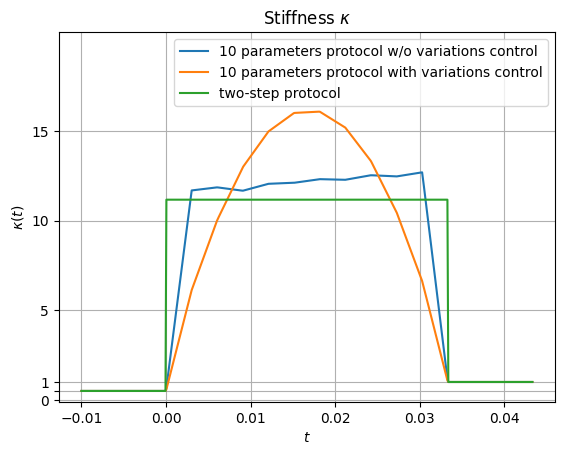

In [67]:

times = np.linspace(-0.01, tf+0.01, 500)
kappa0 = np.array([sim0.force.kappa(t).item() for t in times])
kappa2 = np.array([sim2.force.kappa(t).item() for t in times])
kappaTSP = np.array([simTSP.force.kappa(t).item() for t in times])

fig = plt.figure()
plt.plot(times, kappa0, label="10 parameters protocol w/o variations control")
plt.plot(times, kappa2, label="10 parameters protocol with variations control")
plt.plot(times, kappaTSP, label="two-step protocol")

yrange = (-0.1, 20.5)
plt.ylim(yrange)
plt.xlabel("$t$")
plt.ylabel(r"$\kappa(t)$")
plt.title("Stiffness $\kappa$")
plt.legend()
plt.grid(True)
plt.yticks(y_ticks)
plt.gca().set_yticklabels(y_ticklabels)
# Adjust legend position
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place outside, top right
plt.legend(loc='upper right')  # Place inside
# Show plot
# plt.tight_layout() # Adjust layout to prevent clipping
plt.show()

In [69]:
fig.savefig("kappa_comparison.pdf", bbox_inches='tight')